In [1]:

#Clean tye data set, remove outliers in columns balance and amount
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\sures\Desktop\123.csv')
df.count()

Total_balance    100
Cus_id           100
Unnamed: 2         0
Annual_salary    100
Long_lat         100
Age              100
dtype: int64

In [3]:
df.isnull().sum()


Total_balance      0
Cus_id             0
Unnamed: 2       100
Annual_salary      0
Long_lat           0
Age                0
dtype: int64

In [31]:
# Separate features and labels
X, y = df[['Total_balance','Age']].values,df['Annual_salary'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[ 1758186.58       19.  ]
 [  665248.77       26.  ]
 [  806710.31       30.  ]
 [  465855.96       21.  ]
 [  260858.31       35.  ]
 [  410738.73       18.  ]
 [  400793.8        30.  ]
 [  881717.52       21.  ]
 [29983336.71       40.  ]
 [ 3916213.76       24.  ]]

Labels:
[27842.22  8603.88 10851.72 13481.91  8703.84 11713.74 21277.36 18010.37
 29512.28 12048.98]


In [32]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.size, X_test.size))

Training Set: 140, rows
Test Set: 60 rows


In [33]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [34]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [16299. 16423. 16258. 16927. 16270. 16358. 16562. 16950. 15804. 18599.]
Actual labels   :  [28925.61 27327.65 10851.72 25517.55 15929.29  7155.96 14952.56 21497.98
  9844.98 27326.11]


In [35]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 51185812.5426301
RMSE: 7154.4260805902595
R2: 0.1200514894721556


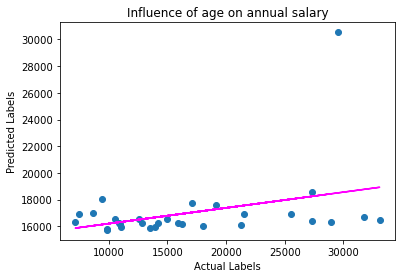

In [36]:

import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Influence of age on annual salary')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()